#Model intialization

In [ ]:
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:

!wget --content-disposition https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/zip -O stylegan2.zip

--2024-04-04 12:30:48--  https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/zip
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 35.167.170.225, 34.212.239.79
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|35.167.170.225|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan2/versions/1/files.zip?Expires=1712237449&Signature=Xa~CFL5UxuUnqZQzfIQzdNyh7Bh8FLe1ponD33nqqc9WJDVbBzHsS7rBgoVH7H289q0Btde~W1T3Aj077kdNBX3mpuxAFT4j4ap2MQbxbxgzezzepMcRIApUX6slpsf3UfzkxZEeOGHVycuo1BDHAqDJSjdOkSjdYbsMqEVo87cvCFMhEu0qCjW66loxIvIHAl-bQWjxNEWEIuC1Vb7vqADBPzenpsQ1TJApP0sdsxM7x7ZwJGolbyooxPHo0XrsXU49zhU8cHXETNA9I1ykSivevxTtDef52q7QEcwqBpNFPFmfOqBL~ItE1CMWGDpZzJ6sv-YXSqzm2sT9FXq43g__&Key-Pair-Id=KCX06E8E9L60W [following]
--2024-04-04 12:30:49--  https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan2/versions/1/files.zip?Expires=1712237449&Signature=Xa~CFL5UxuUnqZQz

In [ ]:

file_path = '/content/stylegan2.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:

    zip_ref.extractall('/content')
files.view('/content')

<IPython.core.display.Javascript object>

In [ ]:

!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja imageio-ffmpeg==0.4.9

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (57/57), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 2.8 MB/s eta 0:00:00


In [ ]:

%cd stylegan2-ada-pytorch
import pickle
import torch
import dnnlib
import torch_utils

with open('/content/stylegan2-ffhq-256x256.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

/content/stylegan2-ada-pytorch


#Generate 10 realistic images

In [ ]:
#generating sample one image
z = torch.randn([1, G.z_dim]).cuda()
c = None
img = G(z, c)
print(img)

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
tensor([[[[0.2844, 0.2661, 0.2478,  ..., 0.4089, 0.4389, 0.4441],
          [0.2620, 0.2309, 0.2408,  ..., 0.4127, 0.4238, 0.4598],
          [0.2366, 0.2213, 0.2337,  ..., 0.3936, 0.4221, 0.4115],
          ...,
          [0.1580, 0.2740, 0.2654,  ..., 0.2645, 0.3186, 0.3325],
          [0.3216, 0.2683, 0.2661,  ..., 0.3229, 0.3528, 0.3934],
          [0.2873, 0.2151, 0.2129,  ..., 0.2785, 0.3193, 0.2868]],

         [[0.3145, 0.3054, 0.2783,  ..., 0.4363, 0.4775, 0.5142],
          [0.3254, 0.2698, 0.2578,  ..., 0.4303, 0.4446, 0.4885],
          [0.2974, 0.2674, 0.2712,  ..., 0.4227, 0.4355, 0.4439],
          ...,
          [0.1454, 0.1933, 0.1997,  ..., 0.1605, 0.1980, 0.2300],
          [0.3482, 0.2322, 0.1744,  ..., 0.2034, 0.2419, 0.2999],
          [0.2854, 0.2161, 0.1624,  ..., 0.2158, 0.2570, 0.1858]],

         [[0.1311, 0.1166, 0.0923,  ..., 0.2745, 0.3081, 0.3400],
 

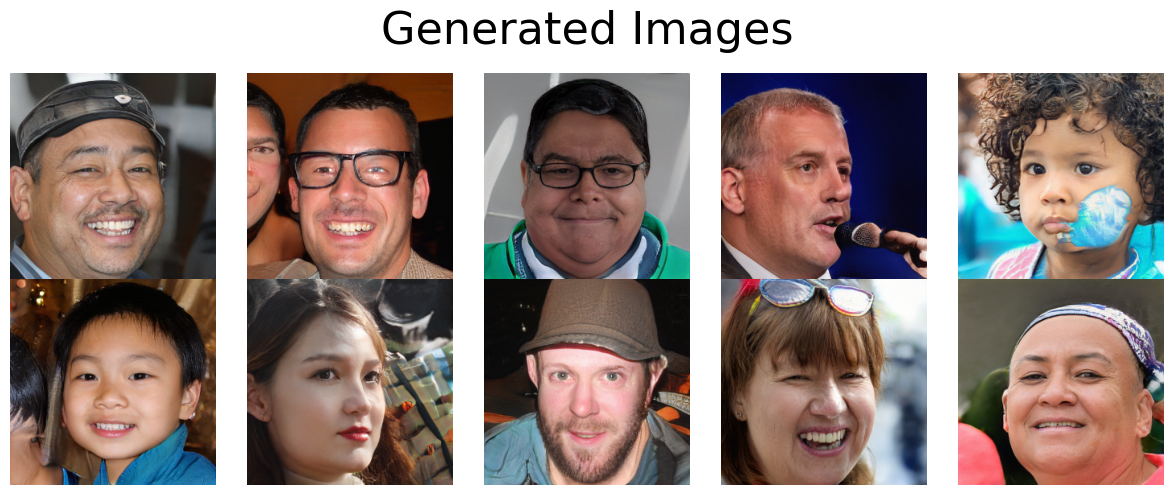

In [ ]:

SCALE = 127.5
OFFSET = 128
CLAMP_MIN = 0
CLAMP_MAX = 255
num_images = 10
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))
for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    z = torch.randn([1, G.z_dim]).cuda()
    c = None
    img = G(z, c)
    image_i_np = img.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)

    axes[row, col].imshow(image_i_np)
    axes[row, col].axis('off')

plt.suptitle('Generated Images', fontsize=32)
plt.tight_layout()
plt.show()


#part-2

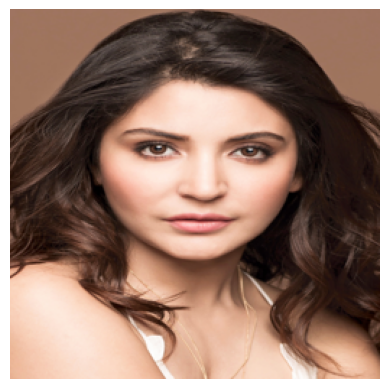

In [ ]:
#original image
img = Image.open("/content/my_image.jpg")
img = img.resize((256, 256))
plt.imshow(img)
plt.axis('off')
plt.show()


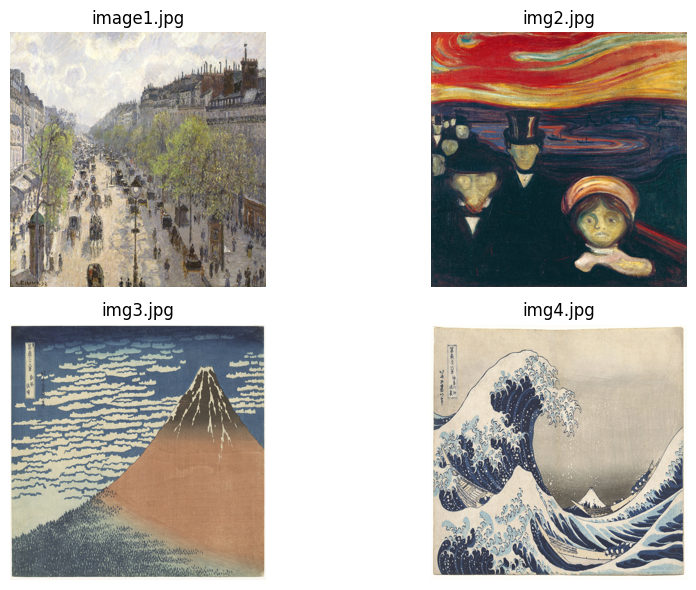

In [ ]:

image_paths = [
    "/content/image1.jpg",
    "/content/img2.jpg",
    "/content/img3.jpg",
    "/content/img4.jpg",
]
num_images = len(image_paths)
num_rows = 2
num_cols = (num_images + 1) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(img)
    axes[row_index, col_index].axis('off')
    axes[row_index, col_index].set_title(image_path.split("/")[-1])

plt.tight_layout()
plt.show()


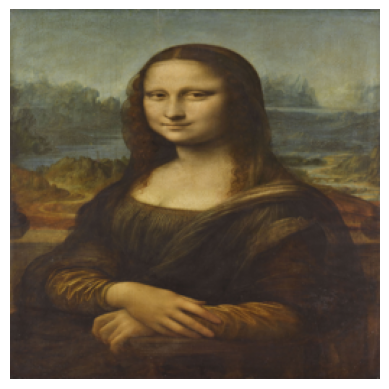

In [ ]:

img = Image.open("/content/img5.jpg")
img = img.resize((256, 256))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
!python projector.py --outdir=/content/projections/my_img --target=/content/my_image.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl

Loading networks from "/content/stylegan2-ffhq-256x256.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.66 loss 24565.03
step    2/1000: dist 0.65 loss 27638.34
step    3/1000: dist 0.73 loss 27166.29
step    4/1000: dist 0.64 loss 26250.19
step    5/1000: dist 0.65 loss 24952.77
step    6/1000: dist 0.65 loss 23350.35
step    7/1000: dist 0.60 loss 21507.74
step    8/1000: dist 0.65 loss 19483.40
step    9/1000: dist 0.65 loss 17339.16
step   10/1000: dist 0.64 loss 15138.29
step   11/1000: dist 0.63 loss 12944.00
step   12/1000: dist 0.66 loss 10815.34
step   13/1000: dist 0.61 loss 8799.49
step   14/1000: dist 0.59 loss 6943.72
step   15/1000: dist 0.58 loss 5311.96
step   16/1000: dist 0.60 loss 3969.47
step   17/1000: dist 0.61 loss 2940.32
step   18/1000: dist 0.59 loss 2208.86
step   19/1000: dist 0.62 loss 1757.56
step   20/1000: dist 0

In [ ]:

!python projector.py --outdir=/content/projections/img1 --target=/content/image1.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl

Loading networks from "/content/stylegan2-ffhq-256x256.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.81 loss 24565.17
step    2/1000: dist 0.79 loss 27638.47
step    3/1000: dist 0.81 loss 27166.37
step    4/1000: dist 0.80 loss 26250.36
step    5/1000: dist 0.82 loss 24952.94
step    6/1000: dist 0.79 loss 23350.49
step    7/1000: dist 0.84 loss 21507.98
step    8/1000: dist 0.80 loss 19483.56
step    9/1000: dist 0.82 loss 17339.34
step   10/1000: dist 0.81 loss 15138.47
step   11/1000: dist 0.81 loss 12944.17
step   12/1000: dist 0.77 loss 10815.45
step   13/1000: dist 0.79 loss 8799.68
step   14/1000: dist 0.77 loss 6943.89
step   15/1000: dist 0.76 loss 5312.15
step   16/1000: dist 0.79 loss 3969.66
step   17/1000: dist 0.80 loss 2940.51
step   18/1000: dist 0.77 loss 2209.05
step   19/1000: dist 0.74 loss 1757.68
step   20/1000: dist 0

In [ ]:
!python projector.py --outdir=/content/projections/img2 --target=/content/img2.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl
!python projector.py --outdir=/content/projections/img3 --target=/content/img3.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl
!python projector.py --outdir=/content/projections/img4 --target=/content/img4.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl
!python projector.py --outdir=/content/projections/img5 --target=/content/img5.jpg \
    --network=/content/stylegan2-ffhq-256x256.pkl

Loading networks from "/content/stylegan2-ffhq-256x256.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.83 loss 24565.19
step    2/1000: dist 0.80 loss 27638.49
step    3/1000: dist 0.81 loss 27166.36
step    4/1000: dist 0.83 loss 26250.38
step    5/1000: dist 0.83 loss 24952.95
step    6/1000: dist 0.80 loss 23350.49
step    7/1000: dist 0.83 loss 21507.97
step    8/1000: dist 0.82 loss 19483.57
step    9/1000: dist 0.83 loss 17339.35
step   10/1000: dist 0.83 loss 15138.49
step   11/1000: dist 0.82 loss 12944.18
step   12/1000: dist 0.80 loss 10815.49
step   13/1000: dist 0.82 loss 8799.70
step   14/1000: dist 0.79 loss 6943.92
step   15/1000: dist 0.77 loss 5312.15
step   16/1000: dist 0.80 loss 3969.67
step   17/1000: dist 0.78 loss 2940.49
step   18/1000: dist 0.76 loss 2209.04
step   19/1000: dist 0.76 loss 1757.69
step   20/1000: dist 0

In [ ]:

latent_codes = []
image_paths = [
    "/content/projections/my_img/projected_w.npz",
    "/content/projections/img1/projected_w.npz",
    "/content/projections/img2/projected_w.npz",
    "/content/projections/img3/projected_w.npz",
    "/content/projections/img4/projected_w.npz",
    "/content/projections/img5/projected_w.npz"
]
for image_path in image_paths:
    w = np.load(image_path)
    w = torch.tensor(w['w']).to(device)
    latent_codes.append(w)


In [ ]:
#declaring alpha
a_values = [1, 0.9, 0.7, 0.5, 0.3, 0.1, 0]
SCALE = 127.5
OFFSET = 128
CLAMP_MIN = 0
CLAMP_MAX = 255

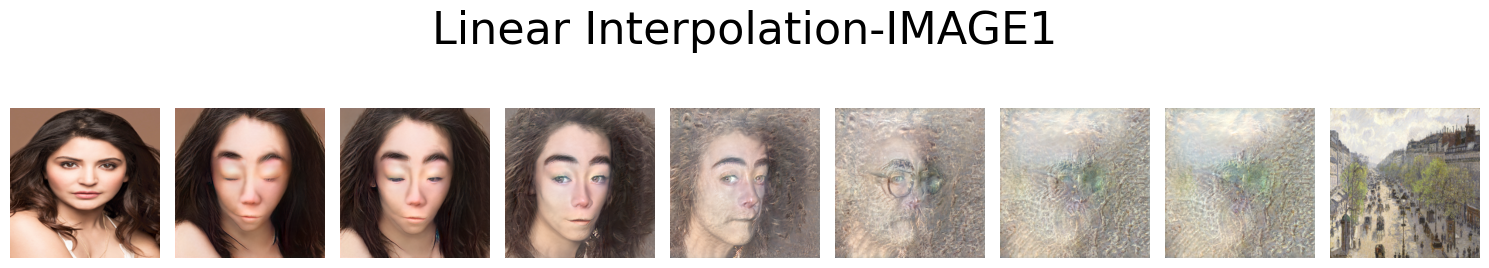

In [ ]:

image_path_beginning = "/content/my_image.jpg"
image_path_end = "/content/image1.jpg"

image_beginning = Image.open(image_path_beginning).resize((256, 256))
image_end = Image.open(image_path_end).resize((256, 256))

num_images = len(a_values) + 2
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

axes[0].imshow(image_beginning)
axes[0].axis('off')

for i, a_value in enumerate(a_values):
    w_i = a_value * latent_codes[0] + (1 - a_value) * latent_codes[1]
    image_i = G.synthesis(w_i, noise_mode='const', force_fp32=True)
    image_i_np = image_i.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)

    axes[i+1].imshow(image_i_np)
    axes[i+1].axis('off')
axes[-1].imshow(image_end)
axes[-1].axis('off')
plt.suptitle('Linear Interpolation-IMAGE1', fontsize=32)

plt.tight_layout()
plt.show()


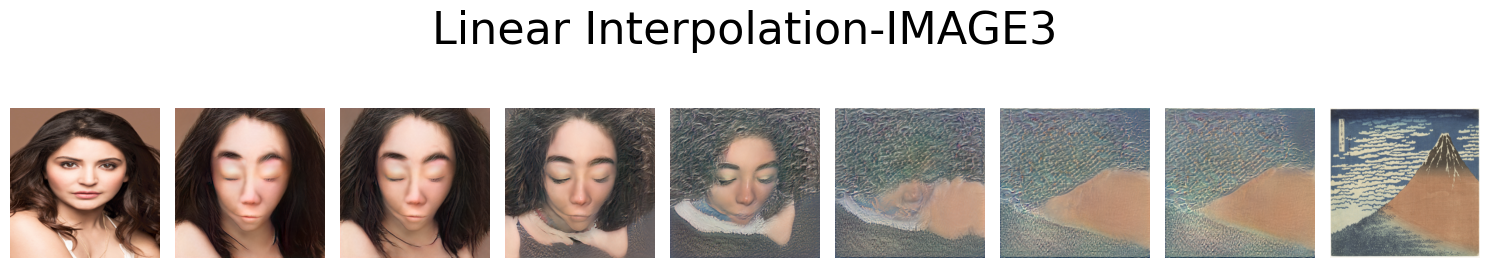

In [ ]:

image_path_beginning = "/content/my_image.jpg"
image_path_end = "/content/img3.jpg"

image_beginning = Image.open(image_path_beginning)
image_beginning  = image_beginning .resize((256, 256))
image_end = Image.open(image_path_end)
image_end = image_end.resize((256, 256))
num_images = len(a_values) + 2
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
axes[0].imshow(image_beginning)
axes[0].axis('off')


for i, a_value in enumerate(a_values):
    w_i = a_value * latent_codes[0] + (1 - a_value) * latent_codes[3]
    image_i = G.synthesis(w_i, noise_mode='const', force_fp32=True)
    image_i_np = image_i.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)

    axes[i+1].imshow(image_i_np)
    axes[i+1].axis('off')

axes[-1].imshow(image_end)
axes[-1].axis('off')
plt.suptitle('Linear Interpolation-IMAGE3', fontsize=32)
plt.tight_layout()
plt.show()


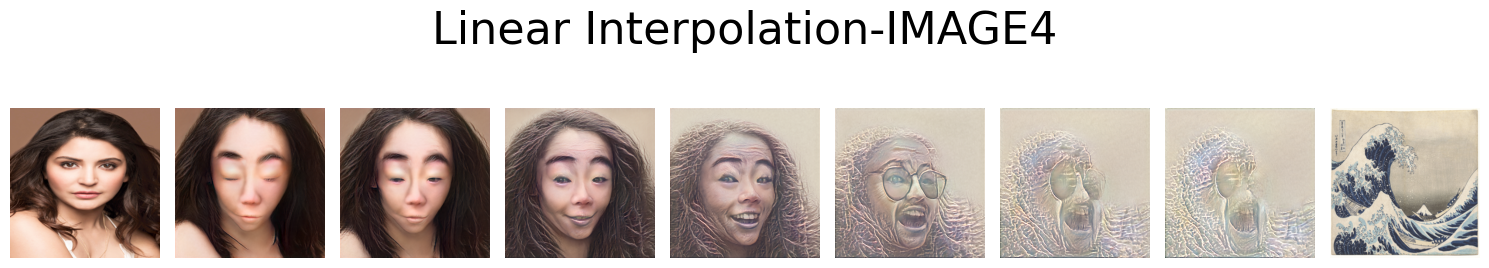

In [ ]:

image_path_beginning = "/content/my_image.jpg"
image_path_end = "/content/img4.jpg"

image_beginning = Image.open(image_path_beginning)
image_beginning  = image_beginning .resize((256, 256))
image_end = Image.open(image_path_end)
image_end = image_end.resize((256, 256))
num_images = len(a_values) + 2
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
axes[0].imshow(image_beginning)
axes[0].axis('off')


for i, a_value in enumerate(a_values):
    w_i = a_value * latent_codes[0] + (1 - a_value) * latent_codes[4]
    image_i = G.synthesis(w_i, noise_mode='const', force_fp32=True)
    image_i_np = image_i.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)
    axes[i+1].imshow(image_i_np)
    axes[i+1].axis('off')

axes[-1].imshow(image_end)
axes[-1].axis('off')
plt.suptitle('Linear Interpolation-IMAGE4', fontsize=32)
plt.tight_layout()
plt.show()


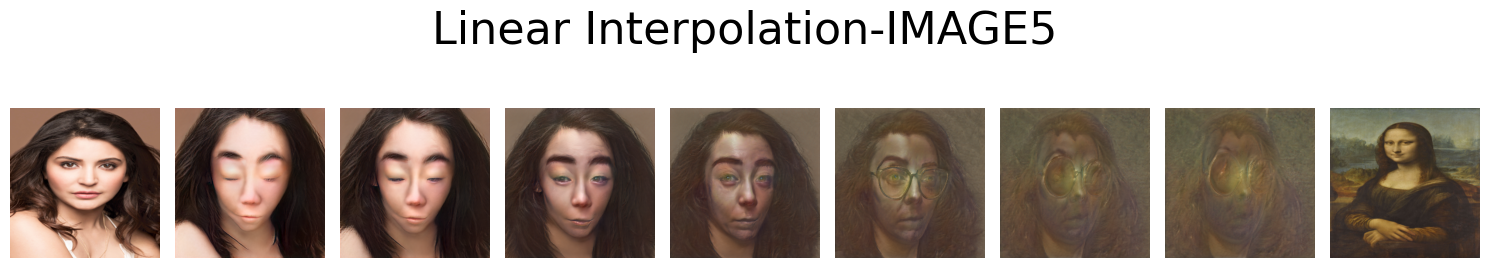

In [ ]:

image_path_beginning = "/content/my_image.jpg"
image_path_end = "/content/img5.jpg"
image_beginning = Image.open(image_path_beginning)
image_beginning  = image_beginning .resize((256, 256))
image_end = Image.open(image_path_end)
image_end = image_end.resize((256, 256))
num_images = len(a_values) + 2
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
axes[0].imshow(image_beginning)
axes[0].axis('off')

for i, a_value in enumerate(a_values):
    w_i = a_value * latent_codes[0] + (1 - a_value) * latent_codes[5]
    image_i = G.synthesis(w_i, noise_mode='const', force_fp32=True)
    image_i_np = image_i.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)
    axes[i+1].imshow(image_i_np)
    axes[i+1].axis('off')
axes[-1].imshow(image_end)
axes[-1].axis('off')
plt.suptitle('Linear Interpolation-IMAGE5', fontsize=32)
plt.tight_layout()
plt.show()


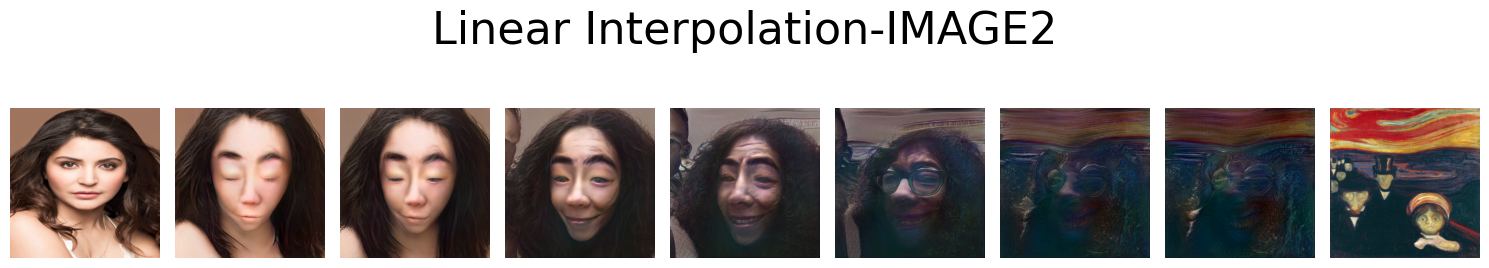

In [ ]:

image_path_beginning = "/content/my_image.jpg"
image_path_end = "/content/img2.jpg"

image_beginning = Image.open(image_path_beginning)
image_beginning  = image_beginning .resize((256, 256))
image_end = Image.open(image_path_end)
image_end = image_end.resize((256, 256))
num_images = len(a_values) + 2
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
axes[0].imshow(image_beginning)
axes[0].axis('off')
for i, a_value in enumerate(a_values):
    w_i = a_value * latent_codes[0] + (1 - a_value) * latent_codes[2]
    image_i = G.synthesis(w_i, noise_mode='const', force_fp32=True)
    image_i_np = image_i.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    image_i_np = image_i_np * SCALE + OFFSET
    image_i_np = np.clip(image_i_np, CLAMP_MIN, CLAMP_MAX).astype(np.uint8)

    axes[i+1].imshow(image_i_np)
    axes[i+1].axis('off')

axes[-1].imshow(image_end)
axes[-1].axis('off')
plt.suptitle('Linear Interpolation-IMAGE2', fontsize=32)
plt.tight_layout()
plt.show()
